In this script the cells were scored with Senepy.
1. Scoring with Senepy
2. Selection of higher score
3. Set threshold for putative senescent cells
4. UMAP of Senepy score
5. Calculate mean Senepy score
6. Calculate percentage of putative senescent cells
7. Comparison of percentage of senescent cells and Senepy score


In [1]:
#load modules
import senepy as sp
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import rc_context

In [2]:
# import gene hubs for mouse
hubs = sp.load_hubs(species = 'Mouse')
hubs.metadata[hubs.metadata.tissue == 'Liver']

,tissue,cell,hub_num,size,n_sen,hyp
41,Liver,Kupffer cell,0,1708,10,0.955715
42,Liver,Kupffer cell,1,401,9,0.011746
43,Liver,endothelial cell of hepatic sinusoid,0,277,10,0.000244
44,Liver,endothelial cell of hepatic sinusoid,1,227,10,0.000047
45,Liver,hepatocyte,0,1088,12,0.293804
46,Liver,hepatocyte,1,140,6,0.001841


In [3]:
# loading data and exclude 1 month old mice
k_adata = sc.read_h5ad('C://Users//Helene//Documents//Master_Thesis//TabulaMurisSenis//Data//droplet_liver_angela.h5ad')
k_adata = k_adata[k_adata.obs['age'] != '1m']
h_adata = sc.read_h5ad('C://Users//Helene//Documents//Master_Thesis//TabulaMurisSenis//Data//droplet_liver_angela.h5ad')
h_adata = h_adata[h_adata.obs['age'] != '1m']
e_adata = sc.read_h5ad('C://Users//Helene//Documents//Master_Thesis//TabulaMurisSenis//Data//droplet_liver_angela.h5ad')
e_adata = e_adata[e_adata.obs['age'] != '1m']

In [4]:
# define subsets for each cell type
kup_subset = k_adata[k_adata.obs['cell_type'] == 'Kupffer cell'].copy()
hep_subset = h_adata[h_adata.obs['cell_type'] == 'hepatocyte'].copy()
ec_subset = e_adata[e_adata.obs['cell_type'] == 'endothelial cell of hepatic sinusoid'].copy()

In [5]:
# change the var_names to gene name instead of ensembl so senepy recognises it
kup_subset.var = kup_subset.var.set_index('feature_name')
hep_subset.var = hep_subset.var.set_index('feature_name')
ec_subset.var = ec_subset.var.set_index('feature_name')

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)


1. Scoring with Senepy

In [6]:
# defining hub number and perform senescoring
kup_subset0 = kup_subset.copy()
kup_subset0.obs['sen_score'] = sp.score_hub(kup_subset0, hubs.hubs[('Liver', 'Kupffer cell', 0)])
kup_subset1 = kup_subset.copy()
kup_subset1.obs['sen_score'] = sp.score_hub(kup_subset1, hubs.hubs[('Liver', 'Kupffer cell', 1)])

hep_subset0 = hep_subset.copy()
hep_subset0.obs['sen_score'] = sp.score_hub(hep_subset0, hubs.hubs[('Liver', 'hepatocyte', 0)])
hep_subset1 = hep_subset.copy()
hep_subset1.obs['sen_score'] = sp.score_hub(hep_subset1, hubs.hubs[('Liver', 'hepatocyte', 1)])

ec_subset0 = ec_subset.copy()
ec_subset0.obs['sen_score'] = sp.score_hub(ec_subset0, hubs.hubs[('Liver', 'endothelial cell of hepatic sinusoid', 0)])
ec_subset1 = ec_subset.copy()
ec_subset1.obs['sen_score'] = sp.score_hub(ec_subset1, hubs.hubs[('Liver', 'endothelial cell of hepatic sinusoid', 1)])

1480/1708(86.65%) genes present in data
###################
Not present: ['BC026585', 'C330027C09Rik', 'Fam55d', 'A130022J15Rik', 'E130012A19Rik', 'March7', '6720463M24Rik', 'Siglec5', '4930534B04Rik', 'Hmga2-ps1', 'Pira6', '2310003L22Rik', 'Gm12504', 'BC052040', 'Fam35a', 'D3Bwg0562e', '1110034A24Rik', 'Myst4', 'Atp5sl', 'D2Ertd750e', 'BC088983', 'B230120H23Rik', 'BC032203', '4632434I11Rik', 'Prmt10', 'Mtap7d3', 'Fam116b', 'Fam179b', 'Ccdc76', '4930415F15Rik', 'Sip1', 'Tmem8', 'Tsga14', '2310004I24Rik', 'Hist1h2ag', 'Gm16515', 'Dus2l', '2610044O15Rik', 'C030046E11Rik', 'Hist1h1a', 'Ccdc94', 'BC024479', '2610002D18Rik', '1700011I03Rik', 'Wdr8', 'A830080D01Rik', 'Gm996', 'BC046404', '1810033B17Rik', '6030446N20Rik', '1300010F03Rik', 'BC068157', 'Bzrap1', 'Gm505', 'Hist1h4f', 'BC023829', 'Fam33a', 'BC029214', 'Atp5s', '5730419I09Rik', 'D9Ertd402e', '2210009G21Rik', '3010026O09Rik', 'Hist1h2bm', 'BC068281', 'A230051G13Rik', 'Diap3', 'Kdelc1', 'Gm16197', 'Lin54', 'D6Mm5e', 'Fam113a', 'Ankr

In [7]:
## check if sen score of hub 0 or 1 is higher and chose higher one
# Hepatocytes

hep_subset_combo = hep_subset0.copy()
hep_subset_combo.obs['sen_score_combined'] = 0
hep_subset_combo.obs['sen_score_hub0'] = 0
hep_subset_combo.obs['sen_score_hub1'] = 0

for index in range(len(hep_subset0.obs_names)):
    cell_name = hep_subset0.obs_names[index]
    sen_score_0 = hep_subset0.obs['sen_score'][index]
    sen_score_1 = hep_subset1.obs['sen_score'][index]
    hep_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
    hep_subset_combo.obs['sen_score_hub1'][index] = sen_score_1
   
    if sen_score_0 > sen_score_1:
        hep_subset_combo.obs['sen_score_combined'][index] = sen_score_0
        #print('sen score 0: ', sen_score_0, 'sen score 1: ', sen_score_1)
    elif sen_score_1 > sen_score_0:
        hep_subset_combo.obs['sen_score_combined'][index] = sen_score_1
        #print('sen score 1: ', sen_score_1, 'sen score 0: ', sen_score_0)


C:\Users\Helene\AppData\Local\Temp\ipykernel_13452\2341119665.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hep_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
C:\Users\Helene\AppData\Local\Temp\ipykernel_13452\2341119665.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hep_subset_combo.obs['sen_score_hub1'][index] = sen_score_1
C:\Users\Helene\AppData\Local\Temp\ipykernel_13452\2341119665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

2. Selection of higher score

In [8]:
## check if sen score of hub 0 or 1 is higher
# Kupffer cells

kup_subset_combo = kup_subset0.copy()
kup_subset_combo.obs['sen_score_combined'] = 0
kup_subset_combo.obs['sen_score_hub0'] = 0
kup_subset_combo.obs['sen_score_hub1'] = 0

for index in range(len(hep_subset0.obs_names)):
    cell_name = kup_subset0.obs_names[index]
    sen_score_0 = kup_subset0.obs['sen_score'][index]
    sen_score_1 = kup_subset1.obs['sen_score'][index]
    kup_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
    kup_subset_combo.obs['sen_score_hub1'][index] = sen_score_1

    if sen_score_0 > sen_score_1:
        kup_subset_combo.obs['sen_score_combined'][index] = float(sen_score_0)
        #print('sen score 0: ', sen_score_0, 'sen score 1: ', sen_score_1)
    elif sen_score_1 > sen_score_0:
        kup_subset_combo.obs['sen_score_combined'][index] = float(sen_score_1)
        #print('sen score 1: ', sen_score_1, 'sen score 0: ', sen_score_0)

C:\Users\Helene\AppData\Local\Temp\ipykernel_13452\2568067890.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kup_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
C:\Users\Helene\AppData\Local\Temp\ipykernel_13452\2568067890.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kup_subset_combo.obs['sen_score_hub1'][index] = sen_score_1
C:\Users\Helene\AppData\Local\Temp\ipykernel_13452\2568067890.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [9]:
## check if sen score of hub 0 or 1 is higher
# endothelial cells

ec_subset_combo = ec_subset0.copy()
ec_subset_combo.obs['sen_score_combined'] = 0
ec_subset_combo.obs['sen_score_hub0'] = 0
ec_subset_combo.obs['sen_score_hub1'] = 0

for index in range(len(ec_subset0.obs_names)):
    cell_name = ec_subset0.obs_names[index]
    sen_score_0 = ec_subset0.obs['sen_score'][index]
    sen_score_1 = ec_subset1.obs['sen_score'][index]
    ec_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
    ec_subset_combo.obs['sen_score_hub1'][index] = sen_score_1

    if sen_score_0 > sen_score_1:
        ec_subset_combo.obs['sen_score_combined'][index] = float(sen_score_1)
        #print('sen score 0: ', sen_score_0, 'sen score 1: ', sen_score_1)
    elif sen_score_1 > sen_score_0:
        ec_subset_combo.obs['sen_score_combined'][index] = float(sen_score_1)
        #print('sen score 1: ', sen_score_1, 'sen score 0: ', sen_score_0)

C:\Users\Helene\AppData\Local\Temp\ipykernel_13452\1954867832.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec_subset_combo.obs['sen_score_hub0'][index] = sen_score_0
C:\Users\Helene\AppData\Local\Temp\ipykernel_13452\1954867832.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec_subset_combo.obs['sen_score_hub1'][index] = sen_score_1
C:\Users\Helene\AppData\Local\Temp\ipykernel_13452\1954867832.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

3. Set threshold for putative senescent cells

In [10]:
## calculate mean and threshold
# Kupffer cells
m_kc = kup_subset_combo.obs.sen_score.mean()
std_kc = kup_subset_combo.obs.sen_score.std() 
thresh = m_kc + 2*std_kc

#function to add senescent label
def is_putative_sen(x):
    if x >= thresh:
        return 1
    else:
        return 0

#map function to a new row in adata.obs
kup_subset_combo.obs['putative_sen'] = kup_subset_combo.obs.sen_score.map(is_putative_sen)
kup_sen = kup_subset_combo[kup_subset_combo.obs['putative_sen'] == 1]

In [11]:
## calculate mean and threshold
# hepatocytes

m_hc = hep_subset_combo.obs.sen_score.mean()
std_hc = hep_subset_combo.obs.sen_score.std() 
thresh = m_hc + 2*std_hc

#function to add senescent label
def is_putative_sen(x):
    if x >= thresh:
        return 1
    else:
        return 0

#map function to a new row in adata.obs
hep_subset_combo.obs['putative_sen'] = hep_subset_combo.obs.sen_score.map(is_putative_sen)
hep_sen = hep_subset_combo[hep_subset_combo.obs['putative_sen'] == 1]

In [12]:
## calculate mean and threshold
# endothelial cells

m_hc = ec_subset_combo.obs.sen_score.mean()
std_hc = ec_subset_combo.obs.sen_score.std() 
thresh = m_hc + 2*std_hc

#function to add senescent label
def is_putative_sen(x):
    if x >= thresh:
        return 1
    else:
        return 0

#map function to a new row in adata.obs

ec_subset_combo.obs['putative_sen'] = ec_subset_combo.obs.sen_score.map(is_putative_sen)
ec_sen = ec_subset_combo[ec_subset_combo.obs['putative_sen'] == 1]

In [13]:
kup_subset.obs['age'].value_counts()

age
30m    1655
18m     221
21m      25
24m      18
3m       13
Name: count, dtype: int64

In [14]:
hep_subset.obs['age'].value_counts()

age
3m     989
18m    267
21m    250
24m     78
30m     30
Name: count, dtype: int64

In [15]:
ec_subset.obs['age'].value_counts()

age
30m    88
18m    27
3m     19
21m    14
24m     7
Name: count, dtype: int64

In [16]:
ec_sen.obs['age'].value_counts()

age
30m    6
18m    1
Name: count, dtype: int64

In [17]:
hep_sen.obs['age'].value_counts()

age
21m    52
3m     17
24m    11
18m     2
30m     2
Name: count, dtype: int64

In [18]:
kup_sen.obs['age'].value_counts()

age
30m    130
24m      4
21m      1
Name: count, dtype: int64

Visualise results for hepatocytes

<Axes: >

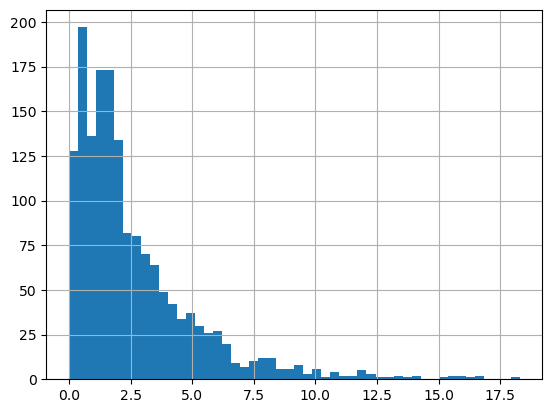

In [19]:
hep_subset_combo.obs.sen_score_combined.hist(bins = 50)

In [20]:
## Calculate mean sen score for each timepoint
#Hepatocytes

# define cell groups per timepoint
m3_sen = hep_sen[hep_sen.obs.age == '3m']
m18_sen = hep_sen[hep_sen.obs.age == '18m']
m21_sen = hep_sen[hep_sen.obs.age == '21m']
m24_sen = hep_sen[hep_sen.obs.age == '24m']
m30_sen = hep_sen[hep_sen.obs.age == '30m']

# calc mean sen score
mean_3m = m3_sen.obs['sen_score'].mean()
mean_18m = m18_sen.obs['sen_score'].mean()
mean_21m = m21_sen.obs['sen_score'].mean()
mean_24m = m24_sen.obs['sen_score'].mean()
mean_30m = m30_sen.obs['sen_score'].mean()

# calc mean std
std_3m = m3_sen.obs['sen_score'].std()
std_18m = m18_sen.obs['sen_score'].std()
std_21m = m21_sen.obs['sen_score'].std()
std_24m = m24_sen.obs['sen_score'].std()
std_30m = m30_sen.obs['sen_score'].std()

senscore_all = [
    {'Age': 3, 'Mean': mean_3m, 'Std': std_3m, 'N-cells': len(m3_sen)},
    {'Age': 18, 'Mean': mean_18m, 'Std': std_18m, 'N-cells': len(m18_sen)},
    {'Age': 21, 'Mean': mean_21m, 'Std': std_21m, 'N-cells': len(m21_sen)},
    {'Age': 24, 'Mean': mean_24m, 'Std': std_24m, 'N-cells': len(m24_sen)},
    {'Age': 30, 'Mean': mean_30m, 'Std': std_30m, 'N-cells': len(m30_sen)}]

senscore_all_df = pd.DataFrame(senscore_all)
senscore_all_df


,Age,Mean,Std,N-cells
0,3,9.560339,2.330935,17
1,18,8.835584,0.728634,2
2,21,10.448789,2.454894,52
3,24,12.396364,3.332881,11
4,30,10.684331,1.836224,2


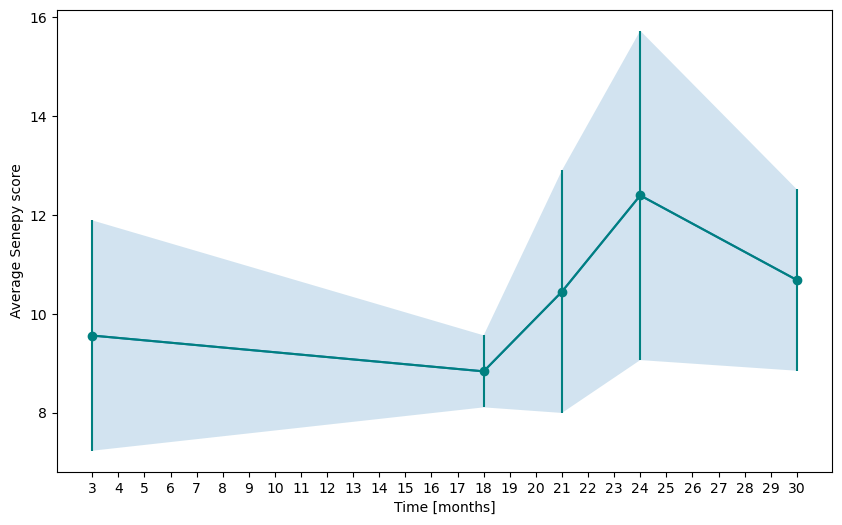

In [21]:
# plot
x = np.array(senscore_all_df['Age'])
y = np.array(senscore_all_df['Mean'])
std = np.array(senscore_all_df['Std'])

plt.figure(figsize=(10,6))
plt.xticks(range(3,31))
plt.plot(x, y)
plt.errorbar(x, y, yerr=std, fmt='-o', color = 'teal')
plt.fill_between(x, y - std, y + std, alpha=0.2)
plt.xlabel('Time [months]')
plt.ylabel('Average Senepy score')
plt.show()


Visualise results for Kupffer cells

<Axes: >

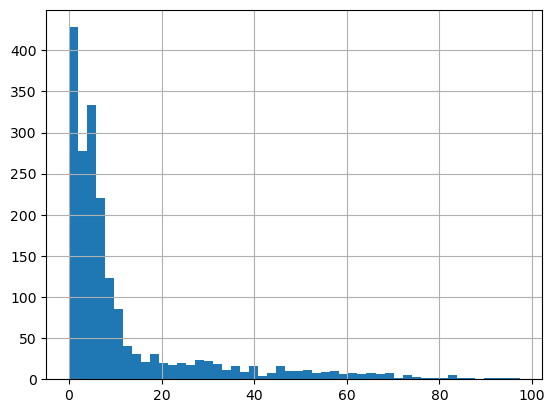

In [22]:
kup_subset_combo.obs.sen_score_combined.hist(bins = 50)

In [23]:
## Calculate mean sen score for each timepoint
# KC

# define cell groups per timepoint
m3_sen = kup_subset_combo[kup_subset_combo.obs.age == '3m']
m18_sen = kup_subset_combo[kup_subset_combo.obs.age == '18m']
m21_sen = kup_subset_combo[kup_subset_combo.obs.age == '21m']
m24_sen = kup_subset_combo[kup_subset_combo.obs.age == '24m']
m30_sen = kup_subset_combo[kup_subset_combo.obs.age == '30m']

# calc mean sen score
mean_3m = m3_sen.obs['sen_score'].mean()
mean_18m = m18_sen.obs['sen_score'].mean()
mean_21m = m21_sen.obs['sen_score'].mean()
mean_24m = m24_sen.obs['sen_score'].mean()
mean_30m = m30_sen.obs['sen_score'].mean()

# calc mean std
std_3m = m3_sen.obs['sen_score'].std()
std_18m = m18_sen.obs['sen_score'].std()
std_21m = m21_sen.obs['sen_score'].std()
std_24m = m24_sen.obs['sen_score'].std()
std_30m = m30_sen.obs['sen_score'].std()

senscore_all = [
    {'Age': 3, 'Mean': mean_3m, 'Std': std_3m, 'N-cells': len(m3_sen)},
    {'Age': 18, 'Mean': mean_18m, 'Std': std_18m, 'N-cells': len(m18_sen)},
    {'Age': 21, 'Mean': mean_21m, 'Std': std_21m, 'N-cells': len(m21_sen)},
    {'Age': 24, 'Mean': mean_24m, 'Std': std_24m, 'N-cells': len(m24_sen)},
    {'Age': 30, 'Mean': mean_30m, 'Std': std_30m, 'N-cells': len(m30_sen)}]

senscore_all_df = pd.DataFrame(senscore_all)
senscore_all_df

,Age,Mean,Std,N-cells
0,3,3.731398,5.037241,13
1,18,2.422071,2.084558,221
2,21,3.088833,4.480898,25
3,24,14.705720,10.091714,18
4,30,9.052661,7.547857,1655


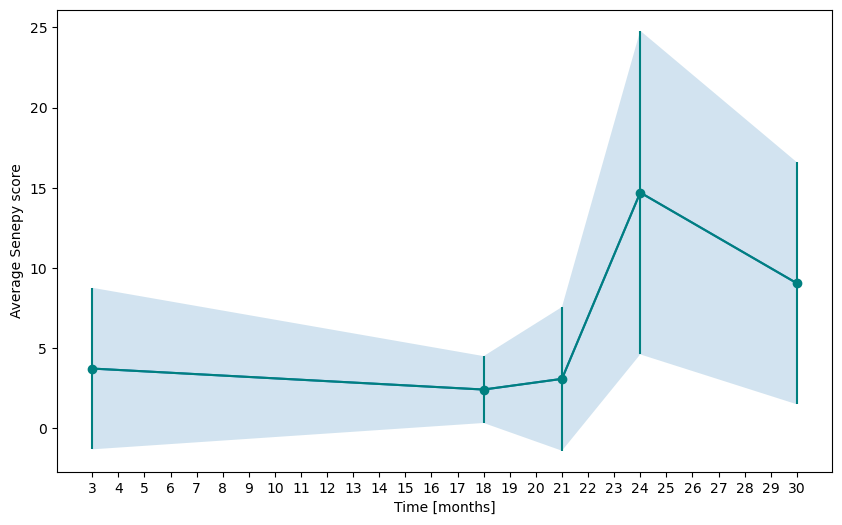

In [24]:
# plot
x = np.array(senscore_all_df['Age'])
y = np.array(senscore_all_df['Mean'])
std = np.array(senscore_all_df['Std'])

plt.figure(figsize=(10,6))
plt.xticks(range(3,31))
plt.plot(x, y)
plt.errorbar(x, y, yerr=std, fmt='-o', color = 'teal')
plt.fill_between(x, y - std, y + std, alpha=0.2)
plt.xlabel('Time [months]')
plt.ylabel('Average Senepy score')
plt.show()


Visualize results for endothelial cells

<Axes: >

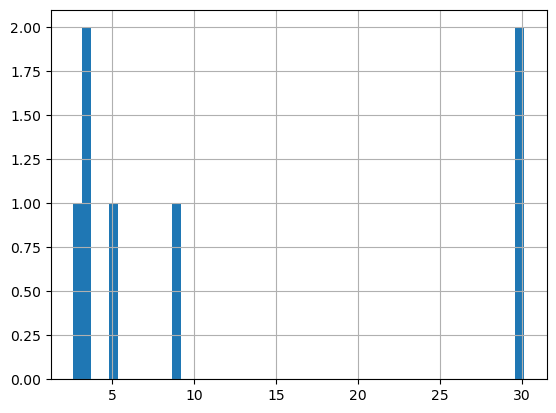

In [25]:
ec_sen.obs.sen_score_combined.hist(bins = 50)

4. UMAP of Senepy score

In [28]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, '#61378B'), (0.1, '#626C98'), (0.3, '#7199C1'), (0.5, '#5FB1AF'),(0.7, '#67A585'),(1, '#ACD355')]  # Format: (position, color)
cmap_name = 'gradual_color_map'
gradual_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

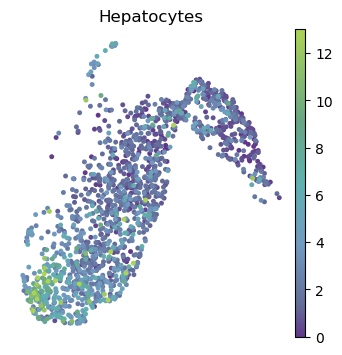

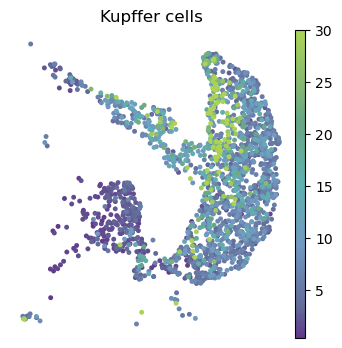

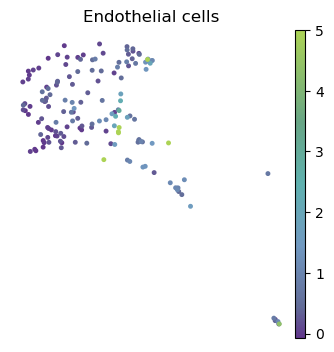

In [29]:

with rc_context({'figure.figsize': (4, 4)}):
        sc.pl.umap(hep_subset_combo, color=['sen_score'], s=50, frameon=False,  vmax= 13, cmap=gradual_cmap, title= 'Hepatocytes')
        
        sc.pl.umap(kup_subset_combo, color='sen_score', s=50, frameon=False,  vmax = 30, cmap=gradual_cmap, title='Kupffer cells' )

        sc.pl.umap(ec_subset_combo, color='sen_score', s=50, frameon=False,  vmax= 5, cmap=gradual_cmap, title= 'Endothelial cells') #'YlGnBu_r'


In [30]:
# all cell types
both_subset_combo = kup_subset_combo.concatenate(hep_subset_combo)
both_subset_combo = both_subset_combo.concatenate(ec_subset_combo)

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)
c:\Users\Helene\mi

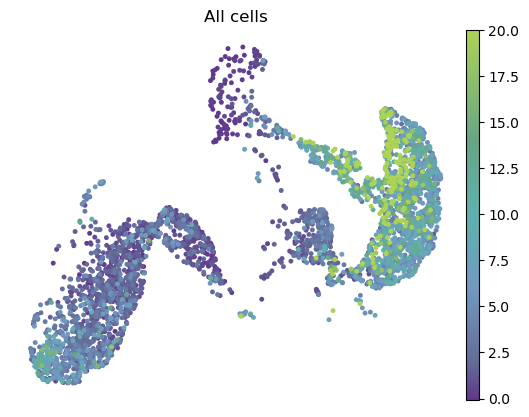

In [31]:
sc.pl.umap(both_subset_combo, color=['sen_score'], s=50, frameon=False, vmax = 20,title= 'All cells', cmap=gradual_cmap)

5. Calculate mean Senepy score

In [32]:

## Calculate mean sen score for each timepoint

# define cell groups per timepoint
m3_sen = both_subset_combo[both_subset_combo.obs.age == '3m']
m18_sen = both_subset_combo[both_subset_combo.obs.age == '18m']
m21_sen = both_subset_combo[both_subset_combo.obs.age == '21m']
m24_sen = both_subset_combo[both_subset_combo.obs.age == '24m']
m30_sen = both_subset_combo[both_subset_combo.obs.age == '30m']

# calc mean sen score
mean_3m = m3_sen.obs['sen_score'].mean()
mean_18m = m18_sen.obs['sen_score'].mean()
mean_21m = m21_sen.obs['sen_score'].mean()
mean_24m = m24_sen.obs['sen_score'].mean()
mean_30m = m30_sen.obs['sen_score'].mean()

# calc mean std
std_3m = m3_sen.obs['sen_score'].std()
std_18m = m18_sen.obs['sen_score'].std()
std_21m = m21_sen.obs['sen_score'].std()
std_24m = m24_sen.obs['sen_score'].std()
std_30m = m30_sen.obs['sen_score'].std()

senscore_all = [
    {'Age': 3, 'Mean': mean_3m, 'Std': std_3m, 'N-cells': len(m3_sen)},
    {'Age': 18, 'Mean': mean_18m, 'Std': std_18m, 'N-cells': len(m18_sen)},
    {'Age': 21, 'Mean': mean_21m, 'Std': std_21m, 'N-cells': len(m21_sen)},
    {'Age': 24, 'Mean': mean_24m, 'Std': std_24m, 'N-cells': len(m24_sen)},
    {'Age': 30, 'Mean': mean_30m, 'Std': std_30m, 'N-cells': len(m30_sen)}]

senscore_all_df = pd.DataFrame(senscore_all)
senscore_all_df

,Age,Mean,Std,N-cells
0,3,2.083305,1.966419,1021
1,18,2.107133,1.783930,515
2,21,4.362477,3.811645,289
3,24,5.711800,6.876274,103
4,30,8.552077,7.548904,1773


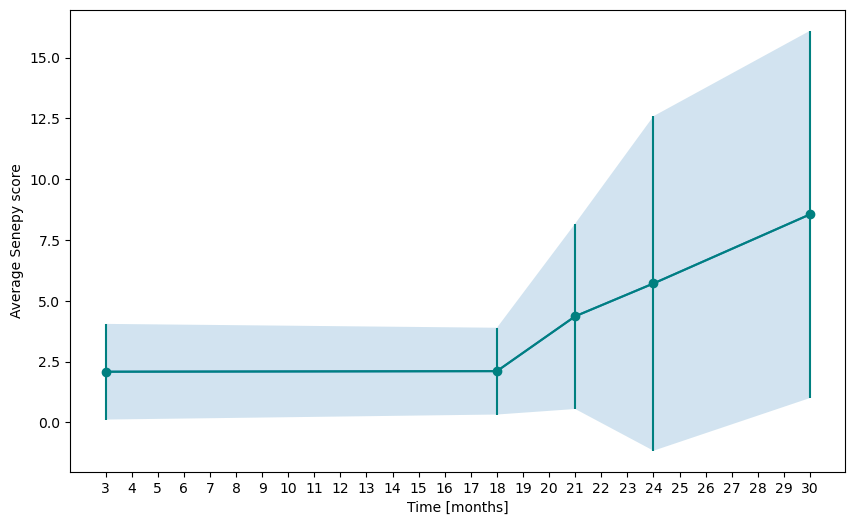

In [33]:
# plot
x = np.array(senscore_all_df['Age'])
y = np.array(senscore_all_df['Mean'])
std = np.array(senscore_all_df['Std'])

plt.figure(figsize=(10,6))
plt.xticks(range(3,31))
plt.plot(x, y)
plt.errorbar(x, y, yerr=std, fmt='-o', color = 'teal')
plt.fill_between(x, y - std, y + std, alpha=0.2)
plt.xlabel('Time [months]')
plt.ylabel('Average Senepy score')
plt.show()


6. Calculate percentage of putative senescent cells

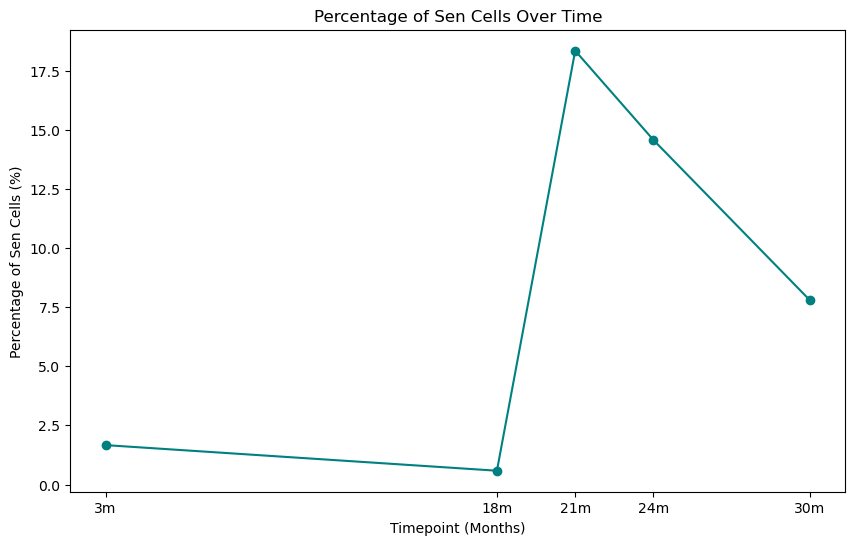

In [34]:
unique_timepoints = both_subset_combo.obs['age'].unique()
results = []
for timepoint in unique_timepoints:
    total_cells = len(both_subset_combo.obs[both_subset_combo.obs['age'] == timepoint])
    putative_sen = len(both_subset_combo.obs[(both_subset_combo.obs['age'] == timepoint) & (both_subset_combo.obs['putative_sen'])])
    percentage = (putative_sen / total_cells) * 100
    results.append({'Timepoint': timepoint, 'Percentage of Sen Cells': percentage})

results_df = pd.DataFrame(results)

results_df['Timepoint Numeric'] = results_df['Timepoint'].str.replace('m', '').astype(int)

results_df = results_df.sort_values(by='Timepoint Numeric')


plt.figure(figsize=(10, 6)) 
plt.plot(results_df['Timepoint Numeric'], results_df['Percentage of Sen Cells'], marker='o', linestyle='-', color='teal')
plt.title('Percentage of Sen Cells Over Time')
plt.xlabel('Timepoint (Months)')
plt.ylabel('Percentage of Sen Cells (%)')
plt.xticks(results_df['Timepoint Numeric'], results_df['Timepoint'])
plt.show()

In [35]:
sen = both_subset_combo[both_subset_combo.obs['putative_sen'] ==1]
sen.obs['age'].value_counts()

age
30m    138
21m     53
3m      17
24m     15
18m      3
Name: count, dtype: int64

In [36]:
m = both_subset_combo[both_subset_combo.obs['age'] == '30m']

<Axes: >

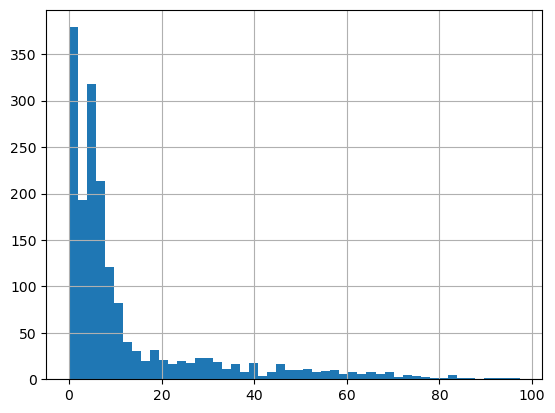

In [37]:
m.obs.sen_score_combined.hist(bins = 50)

6. Comparison of percentage of senescent cells and Senepy score

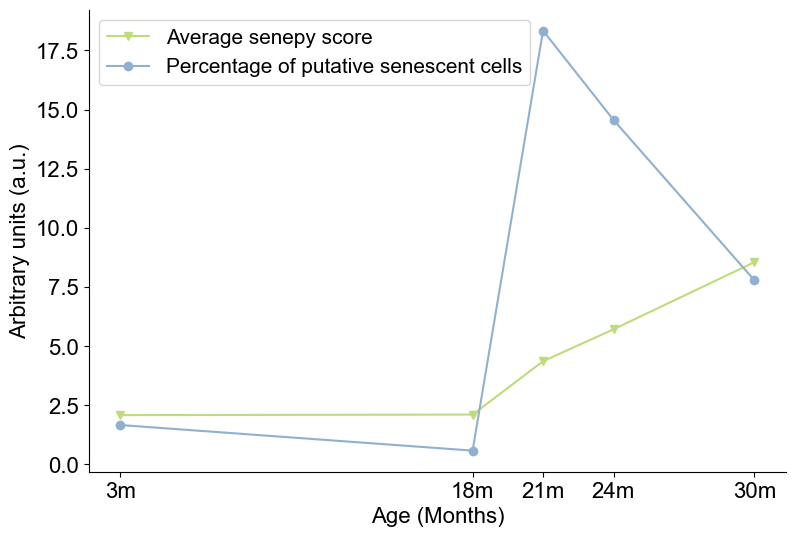

In [38]:
plt.figure(figsize=(9, 6)) 
plt.plot(x, y, marker='v', label = 'Average senepy score' , color = '#BDDC7A' )
plt.plot(results_df['Timepoint Numeric'], results_df['Percentage of Sen Cells'], marker='o', linestyle='-', color='#91B0CF', label = 'Percentage of putative senescent cells')
plt.xlabel('Age (Months)',fontsize=16, fontfamily='arial')
plt.ylabel('Arbitrary units (a.u.)', fontsize=16, fontfamily='arial')
plt.xticks(results_df['Timepoint Numeric'], results_df['Timepoint'], fontsize=16, fontfamily='arial')
plt.yticks(fontsize=16, fontfamily='arial')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper left', prop={'family': 'arial', 'size': 15})
plt.show()

In [39]:
pu_sen = both_subset_combo[both_subset_combo.obs['putative_sen'] == 1]

In [40]:
pu_sen.obs['age'].value_counts()

age
30m    138
21m     53
3m      17
24m     15
18m      3
Name: count, dtype: int64

In [41]:
# calc with replicates

per_mouse_sen = pd.DataFrame(index = ['mouse_id'])
per_mouse_sen.index = both_subset_combo.obs['donor_id'].unique()
per_mouse_sen['expression'] = both_subset_combo.obs.groupby('donor_id')['sen_score'].mean()

per_mouse_sen.reset_index(drop = False, inplace=True)
per_mouse_sen.rename(columns = {'index': 'mouse_id'}, inplace=True)

per_mouse_sen['timepoints'] = per_mouse_sen['mouse_id'].str.split('-', n=1).str[0].astype(int)
per_mouse_sen['plate_id'] = per_mouse_sen.groupby('timepoints').cumcount() + 1
per_mouse_sen.drop('mouse_id', axis = 1, inplace=True)
per_mouse_sen['statevariable'] = 'SC'
per_mouse_sen

,expression,timepoints,plate_id,statevariable
0,2.107133,18,1,SC
1,4.362477,21,1,SC
2,10.299125,24,1,SC
3,9.162677,30,1,SC
4,6.745723,30,2,SC
5,2.213274,30,3,SC
6,2.255117,3,1,SC
7,2.389555,3,2,SC
8,4.082093,24,2,SC
9,1.819562,3,3,SC


In [42]:
# adapt sen dataframe
senscore_all_df['Age'] = senscore_all_df['Age'].map(float)
senscore_all_df = senscore_all_df.set_index('Age')
sen_genes = senscore_all_df[['Mean']]
sen_genes = sen_genes.reset_index()
sen_genes = sen_genes.rename(columns = {'Age': 'timepoints', 'Mean': 'expression'})
sen_genes['timepoints'] = sen_genes['timepoints'].map(str)
sen_genes['expression'] = sen_genes['expression'].map(str)
sen_genes['statevariable'] = 'SC'
sen_genes

,timepoints,expression,statevariable
0,3.0,2.083305121518523,SC
1,18.0,2.10713319550184,SC
2,21.0,4.362477181739955,SC
3,24.0,5.71180028953027,SC
4,30.0,8.552077017937549,SC


In [43]:
# save all cells with calculated senescence score

#both_subset_combo.write_h5ad('C://Users//Helene//Documents//Master_Thesis//TabulaMurisSenis//Data//all_sen_score_ec.h5ad')